In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])

In [49]:
def initialize_network_parameters():

    inputSize = 2
    hiddenSize = 2
    outputSize = 1
    lr = 0.1
    epochs = 180000


    w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1
    b1 = np.random.rand(hiddenSize, 1) * 2 - 1
    w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1
    b2 = np.random.rand(outputSize, 1) * 2 - 1

    return w1, b1, w2, b2, lr, epochs

In [51]:
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

Epoch: 9999, Average error: 0.27845
Epoch: 19999, Average error: 0.26680
Epoch: 29999, Average error: 0.26282
Epoch: 39999, Average error: 0.26069
Epoch: 49999, Average error: 0.25933
Epoch: 59999, Average error: 0.25836
Epoch: 69999, Average error: 0.25764
Epoch: 79999, Average error: 0.25706
Epoch: 89999, Average error: 0.25660
Epoch: 99999, Average error: 0.25621
Epoch: 109999, Average error: 0.25588
Epoch: 119999, Average error: 0.25560
Epoch: 129999, Average error: 0.25535
Epoch: 139999, Average error: 0.25513
Epoch: 149999, Average error: 0.25494
Epoch: 159999, Average error: 0.25476
Epoch: 169999, Average error: 0.25460
Epoch: 179999, Average error: 0.25446


In [53]:
z1=np.dot(w1,X)+b1
a1=1/(1+np.exp(-z1))

z2=np.dot(w2,a1)+b2
a2=1/(1+np.exp(-z2))

print('Final output after training: ',a2)
print('Ground truth ',d)
print('Error after training: ',error)
print('Avenger error :%0.05f'%np.average(abs(error)))

Final output after training:  [[0.00798906 0.99042316 0.49985922 0.50013024]]
Ground truth  [0 1 1 0]
Error after training:  [[-0.00798908  0.00957687  0.50014078 -0.50013024]]
Avenger error :0.25446


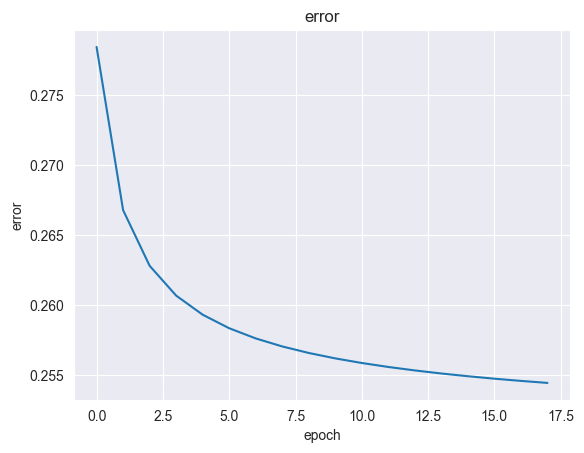

In [54]:
plt.plot(error_list)
plt.title('error')
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()

Epoch: 9999, Average error: 0.11607
Epoch: 19999, Average error: 0.06511
Epoch: 29999, Average error: 0.05127
Epoch: 39999, Average error: 0.04415
Epoch: 49999, Average error: 0.03962
Epoch: 59999, Average error: 0.03640
Epoch: 69999, Average error: 0.03396
Epoch: 79999, Average error: 0.03202
Epoch: 89999, Average error: 0.03043
Epoch: 99999, Average error: 0.02910
Epoch: 109999, Average error: 0.02796
Epoch: 119999, Average error: 0.02696
Epoch: 129999, Average error: 0.02609
Epoch: 139999, Average error: 0.02531
Epoch: 149999, Average error: 0.02461
Epoch: 159999, Average error: 0.02398
Epoch: 169999, Average error: 0.02340
Epoch: 179999, Average error: 0.02287


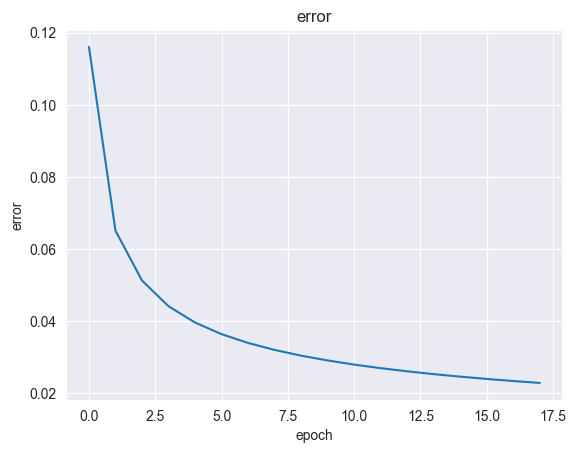

In [56]:
X=np.array([[0,0], [0,1], [1,0], [1,1]]).T
d = np.array([0, 0, 1, 0])

w1,b1,w2,b2,lr,epochs=initialize_network_parameters()
error_list = []
for epoch in range(epochs):
    z1 = np.dot(w1, X) + b1
    a1 = 1 / (1 + np.exp(-z1))

    z2=np.dot(w2,a1)+b2
    a2=1 / (1 + np.exp(-z2))

    error=d-a2
    da2=error * (a2 * (1 - a2))
    dz2 = da2 * (a2 * (1 - a2))

    da1=np.dot(w2.T, dz2)
    dz1=da1 * (a1 * (1 - a1))

    w2+=lr*np.dot(dz2, a1.T)
    b2+=lr*np.sum(dz2, axis=1, keepdims=True)

    w1+=lr*np.dot(dz1,X.T)
    b1+=lr*np.sum(dz1,axis=1, keepdims=True)
    if (epoch+1)%10000 == 0:
        print('Epoch: %d, Average error: %0.05f'%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

z1=np.dot(w1,X)+b1
a1=1/(1+np.exp(-z1))

z2 = np.dot(w2, a1) + b2
a2 = 1 / (1 + np.exp(-z2))

plt.plot(error_list)
plt.title('error')
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()


Epoch: 9999, Average error: 0.46959
Epoch: 19999, Average error: 0.16357
Epoch: 29999, Average error: 0.10220
Epoch: 39999, Average error: 0.08266
Epoch: 49999, Average error: 0.07214
Epoch: 59999, Average error: 0.06529
Epoch: 69999, Average error: 0.06035
Epoch: 79999, Average error: 0.05656
Epoch: 89999, Average error: 0.05353
Epoch: 99999, Average error: 0.05103
Epoch: 109999, Average error: 0.04892
Epoch: 119999, Average error: 0.04710
Epoch: 129999, Average error: 0.04552
Epoch: 139999, Average error: 0.04412
Epoch: 149999, Average error: 0.04287
Epoch: 159999, Average error: 0.04174
Epoch: 169999, Average error: 0.04072
Epoch: 179999, Average error: 0.03979


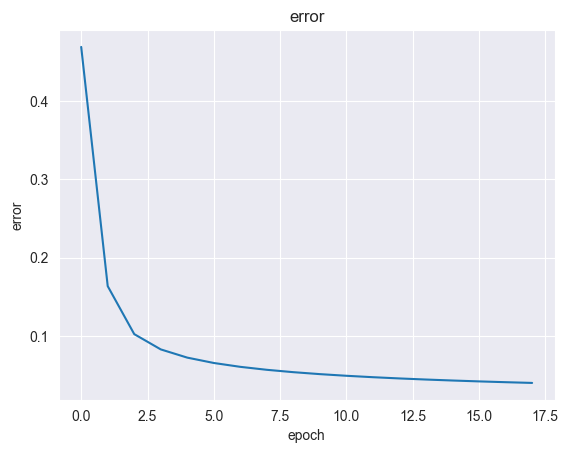

In [57]:
lr=0.01
epochs=1000000
X=np.array([[0,0], [0,1], [1,0], [1,1]]).T
d = np.array([0, 1, 1, 0])

w1,b1,w2,b2,lr,epochs=initialize_network_parameters()
error_list = []
for epoch in range(epochs):
    z1 = np.dot(w1, X) + b1
    a1 = 1 / (1 + np.exp(-z1))

    z2=np.dot(w2,a1)+b2
    a2=1 / (1 + np.exp(-z2))

    error=d-a2
    da2=error * (a2 * (1 - a2))
    dz2 = da2 * (a2 * (1 - a2))

    da1=np.dot(w2.T, dz2)
    dz1=da1 * (a1 * (1 - a1))

    w2+=lr*np.dot(dz2, a1.T)
    b2+=lr*np.sum(dz2, axis=1, keepdims=True)

    w1+=lr*np.dot(dz1,X.T)
    b1+=lr*np.sum(dz1,axis=1, keepdims=True)
    if (epoch+1)%10000 == 0:
        print('Epoch: %d, Average error: %0.05f'%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

z1=np.dot(w1,X)+b1
a1=1/(1+np.exp(-z1))

z2 = np.dot(w2, a1) + b2
a2 = 1 / (1 + np.exp(-z2))

plt.plot(error_list)
plt.title('error')
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()